In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
data= pd.read_csv('Project.csv')

#check for missing values
print(data.isnull().sum())

#impute missing values with mean
data.fillna(data.mean(), inplace=True)

#Descriptive statistics
desc_stats= data.describe()
print(desc_stats)

# Plot histograms for each variable
data.hist(bins=10, figsize=(12,8))
plt.show()

In [2]:
# Check the data types for the variables
print(data.dtypes)

# Convert date into Unix timestamp
data['DATE'] = pd.to_datetime(data['DATE']).astype(int)/10**9

print(data.dtypes)

# Calculate correlation matrix
corr_matrix = data[['Food Expenditures', 'DATE', 'GDP', 'S&P 500', 'Home Price Index', 
                    'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']].corr()

# Print correlation matrix
print(corr_matrix)

DATE                     object
Food Expenditures       float64
GDP                     float64
S&P 500                 float64
Home Price Index        float64
Unemployed Rate         float64
Real Personal Income    float64
Retail Sales            float64
CPI                     float64
dtype: object
DATE                    float64
Food Expenditures       float64
GDP                     float64
S&P 500                 float64
Home Price Index        float64
Unemployed Rate         float64
Real Personal Income    float64
Retail Sales            float64
CPI                     float64
dtype: object
                      Food Expenditures      DATE       GDP   S&P 500  \
Food Expenditures              1.000000  0.959797  0.967718  0.967858   
DATE                           0.959797  1.000000  0.962011  0.950977   
GDP                            0.967718  0.962011  1.000000  0.960462   
S&P 500                        0.967858  0.950977  0.960462  1.000000   
Home Price Index               

In [3]:
# Calculate correlation coefficients with food_expenditure
corr_coeffs = data.corr()['Food Expenditures'].sort_values(ascending=False)
# Print correlation coefficients
print(corr_coeffs)

Food Expenditures       1.000000
Home Price Index        0.984239
CPI                     0.973996
Retail Sales            0.968568
S&P 500                 0.967858
GDP                     0.967718
DATE                    0.959797
Real Personal Income    0.912266
Unemployed Rate        -0.224710
Name: Food Expenditures, dtype: float64


In [74]:
import statsmodels.api as sm
import numpy as np

data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

model = sm.OLS(y,X).fit()

coef_std= model.params/model.bse

print(coef_std)

GDP                     24.061207
S&P 500                  9.768449
Home Price Index         3.113232
Unemployed Rate         19.435763
Real Personal Income    -0.893075
Retail Sales            -0.562914
CPI                      3.178358
dtype: float64


/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_36015/1597308334.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


In [76]:
model = sm.OLS(y,X).fit()

coef_std = model.params / model.bse

coef_abs = abs(coef_std[1:])

coef_abs_sum = coef_abs.sum()

coef_norm = coef_abs / coef_abs_sum

print(coef_norm)

S&P 500                 0.264357
Home Price Index        0.084251
Unemployed Rate         0.525976
Real Personal Income    0.024169
Retail Sales            0.015234
CPI                     0.086014
dtype: float64


In [15]:
# Define dependent and independent variables 
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Add constant term to independet variables
X= sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     777.0
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           1.00e-34
Time:                        22:04:09   Log-Likelihood:                -153.62
No. Observations:                  41   AIC:                             323.2
Df Residuals:                      33   BIC:                             336.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -352.4315 

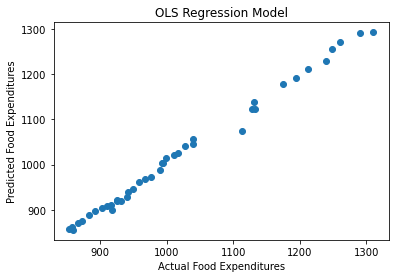

Mean Squared Error: 103.68721809086733


In [6]:
from sklearn.metrics import mean_squared_error
#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the data into X and y
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF table
print(vif)

              variables           VIF
0                   GDP  12197.642069
1               S&P 500    325.994025
2      Home Price Index   1689.876666
3       Unemployed Rate     57.352612
4  Real Personal Income   1411.197878
5          Retail Sales   2677.502748
6                   CPI   5548.297449


Mean Squared Error: 649.1351701526798
Coefficients: [ 6.00081395e-04  2.24585174e-02  1.85249594e+00  7.13374956e+00
  1.69280268e-02  1.73296970e-04 -4.04596799e-01]


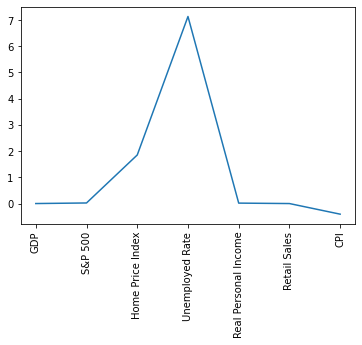

In [8]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# perform ridge regression with cross-validation to tune alpha parameter
alphas = np.logspace(-4, 4, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

# evaluate model performance on test set
y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# print coefficients of independent variables
coef = ridge_cv.coef_
print("Coefficients:", coef)

# plot coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.show()

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

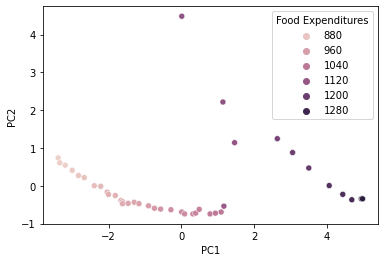

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# create a dataframe with your independent variables
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# add the dependent variable 'food expenditures' to the new dataframe
principal_df['Food Expenditures'] = data['Food Expenditures']

# plot the principal components against the dependent variable
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Food Expenditures')

In [10]:
#  X is data matrix
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Create a PCA object with n_components = number of features
pca = PCA(n_components=X.shape[1])

# Fit PCA on the data matrix X
pca.fit(X)

# Get the variance ratio of each principal component
var_ratio = pca.explained_variance_ratio_

# Print the variance ratio of each principal component
for i, ratio in enumerate(var_ratio):
    print(f"Variance ratio of PC{i + 1}: {ratio:.4f}")

Variance ratio of PC1: 0.9999
Variance ratio of PC2: 0.0001
Variance ratio of PC3: 0.0000
Variance ratio of PC4: 0.0000
Variance ratio of PC5: 0.0000
Variance ratio of PC6: 0.0000
Variance ratio of PC7: 0.0000


                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           8.21e-37
Time:                        22:10:10   Log-Likelihood:                -164.55
No. Observations:                  41   AIC:                             337.1
Df Residuals:                      37   BIC:                             344.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -59.6116     51.369     

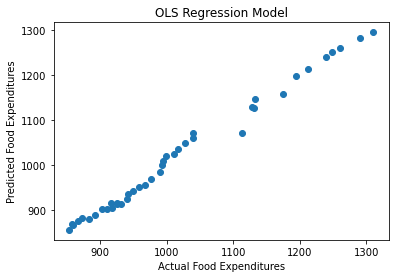

Mean Squared Error: 179.2706294408747


In [16]:
# create a new dataframe with the selected principal component and dependent variable
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP','S&P 500','Unemployed Rate']]

# Add constant term to independet variables
X= sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())


#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [17]:
import statsmodels.api as sm

y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the p-values and t-values of the model
p_values = model.pvalues
t_values = model.tvalues

print("P values:", p_values)
print("t values:", t_values)

P values: GDP                     0.337249
S&P 500                 0.127583
Home Price Index        0.000294
Unemployed Rate         0.002054
Real Personal Income    0.007614
Retail Sales            0.874494
CPI                     0.094716
dtype: float64
t values: GDP                     0.973359
S&P 500                 1.561857
Home Price Index        4.034053
Unemployed Rate         3.338065
Real Personal Income    2.837419
Retail Sales           -0.159148
CPI                     1.718959
dtype: float64


<AxesSubplot:>

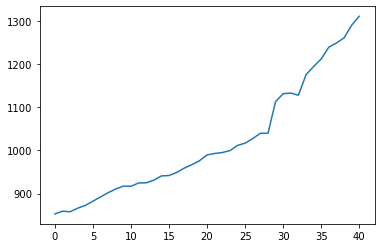

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
df=pd.read_csv('Project.csv')
df['Food Expenditures'].plot()

P-value:  0.9990476601506094


/Users/kikotsui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


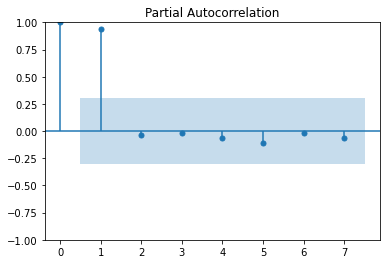

In [24]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(df['Food Expenditures'], autolag='AIC')

# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Food Expenditures'], lags=7)

In [30]:
#you are creating a train and test set and need to have a large enough sample size if your data is small you may have to adjust the length of the data frame (-102) to a smaller number.

# Run the AutoReg Model
# Create training and test data
train_data = df['Food Expenditures'][:len(df)-20]
test_data = df['Food Expenditures'][len(df)-20:]

# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=7).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:      Food Expenditures   No. Observations:                   21
Model:                     AutoReg(7)   Log Likelihood                 -34.660
Method:               Conditional MLE   S.D. of innovations              2.877
Date:                Fri, 28 Apr 2023   AIC                             87.320
Time:                        11:45:43   BIC                             93.072
Sample:                             7   HQIC                            86.788
                                   21                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -29.9690     34.633     -0.865      0.387     -97.848      37.910
Food Expenditures.L1     0.8348      0.274      3.049      0.002       0.298       1.371
Food Expendi

In [31]:
from statsmodels.stats.stattools import durbin_watson

# Fit AR model
ar_model = AutoReg(train_data, lags=7).fit()

# Calculate Durbin-Watson statistic
dw = durbin_watson(ar_model.resid)

# Print Durbin-Watson statistic
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 2.0476970540035464


DATE                    0
Food Expenditures       0
GDP                     0
S&P 500                 0
Home Price Index        0
Unemployed Rate         0
Real Personal Income    0
Retail Sales            0
CPI                     0
dtype: int64


/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_36015/1618231002.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


       Food Expenditures           GDP      S&P 500  Home Price Index  \
count         374.000000    374.000000   374.000000        374.000000   
mean          741.214171  14230.083636  1593.017059        149.890420   
std           244.490313   5194.596136   998.640741         55.595893   
min           400.400000   6315.523000   403.690000         76.085000   
25%           519.850000   9833.447500   975.945000         98.679750   
50%           739.700000  14377.252500  1284.475000        147.816000   
75%           918.525000  18171.626250  2055.160000        182.204500   
max          1329.800000  26547.644000  4766.180000        305.152000   

       Unemployed Rate  Real Personal Income   Retail Sales         CPI  
count       374.000000            374.000000     374.000000  374.000000  
mean          5.790642          12842.700575  360177.478610  205.736179  
std           1.780696           2953.332914  127213.129047   41.277248  
min           3.400000           7944.730000  

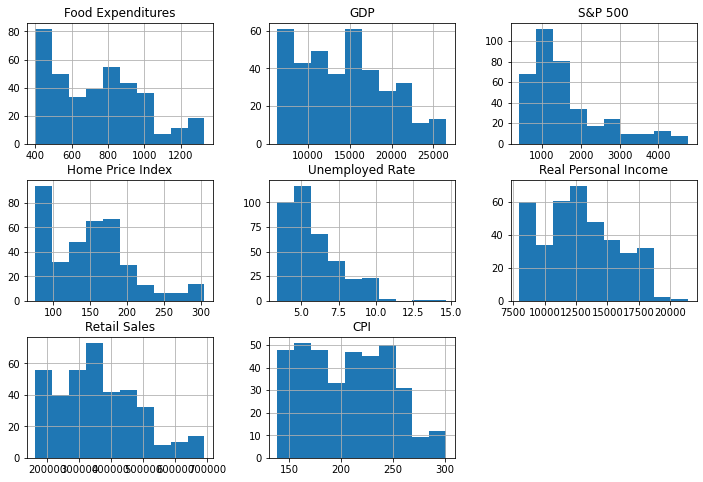

In [32]:
# Load data but bigger sample size
data= pd.read_csv('Project Data - monthly.csv')

#check for missing values
print(data.isnull().sum())

#impute missing values with mean
data.fillna(data.mean(), inplace=True)

#Descriptive statistics
desc_stats= data.describe()
print(desc_stats)

# Plot histograms for each variable
data.hist(bins=10, figsize=(12,8))
plt.show()

In [33]:
# Calculate correlation coefficients with food_expenditure
corr_coeffs = data.corr()['Food Expenditures'].sort_values(ascending=False)
# Print correlation coefficients
print(corr_coeffs)

Food Expenditures       1.000000
GDP                     0.994418
CPI                     0.992134
Retail Sales            0.987473
Real Personal Income    0.981336
Home Price Index        0.943801
S&P 500                 0.913177
Unemployed Rate        -0.050280
Name: Food Expenditures, dtype: float64


/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_36015/1766715491.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


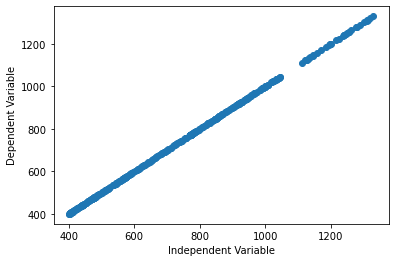

                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.126e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:22:18   Log-Likelihood:                -1581.3
No. Observations:                 374   AIC:                             3179.
Df Residuals:                     366   BIC:                             3210.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -89.5902 

In [56]:
# Define dependent and independent variables 
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Add constant term to independet variables
X= sm.add_constant(X)

plt.scatter(x, y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())

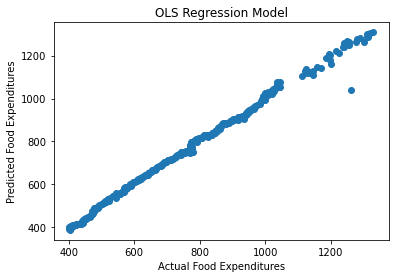

Mean Squared Error: 275.4420336042734


In [35]:
from sklearn.metrics import mean_squared_error
#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the data into X and y
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF table
print(vif)

              variables          VIF
0                   GDP   749.895225
1               S&P 500    58.660310
2      Home Price Index   135.346486
3       Unemployed Rate    18.375398
4  Real Personal Income   685.659645
5          Retail Sales  1881.955387
6                   CPI   956.176722


Mean Squared Error: 204.18013913318248
Coefficients: [ 3.28334853e-02  4.82780247e-02  3.19398472e-01  9.93974110e+00
 -2.82238872e-03 -4.51521276e-04  1.92726723e+00]


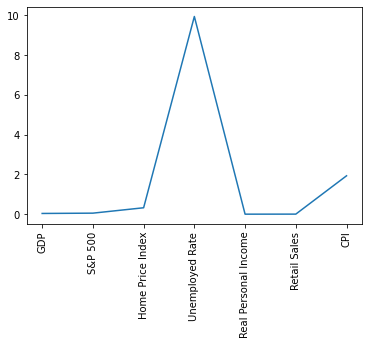

In [37]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# perform ridge regression with cross-validation to tune alpha parameter
alphas = np.logspace(-4, 4, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train, y_train)

# evaluate model performance on test set
y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# print coefficients of independent variables
coef = ridge_cv.coef_
print("Coefficients:", coef)

# plot coefficients
import matplotlib.pyplot as plt
plt.plot(range(len(coef)), coef)
plt.xticks(range(len(coef)), X.columns, rotation=90)
plt.show()

In [41]:
from sklearn.decomposition import PCA
#  X is data matrix
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Create a PCA object with n_components = number of features
pca = PCA(n_components=X.shape[1])

# Fit PCA on the data matrix X
pca.fit(X)

# Get the variance ratio of each principal component
var_ratio = pca.explained_variance_ratio_

# Print the variance ratio of each principal component
for i, ratio in enumerate(var_ratio):
    print(f"Variance ratio of PC{i + 1}: {ratio:.6f}")

Variance ratio of PC1: 0.999940
Variance ratio of PC2: 0.000043
Variance ratio of PC3: 0.000012
Variance ratio of PC4: 0.000005
Variance ratio of PC5: 0.000000
Variance ratio of PC6: 0.000000
Variance ratio of PC7: 0.000000


                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.915e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:11:08   Log-Likelihood:                -1588.2
No. Observations:                 374   AIC:                             3186.
Df Residuals:                     369   BIC:                             3206.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               22.9971      4.334  

/var/folders/h5/v3qyf40113lctbtb5g8k2k340000gn/T/ipykernel_36015/192031399.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


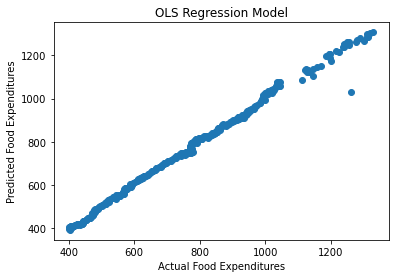

Mean Squared Error: 285.75206558523905


In [46]:
# create a new dataframe with the selected principal component and dependent variable
data = data.fillna(data.mean())
y= data['Food Expenditures']
X= data[['GDP','S&P 500','Home Price Index', 'Unemployed Rate']]

# Add constant term to independet variables
X= sm.add_constant(X)

# Fit multiple linear regression model
model = sm.OLS(y, X).fit()

#print summary of regression result
print(model.summary())


#Get the predicted values of the model
y_pred= model.predict(X)

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Food Expenditures')
plt.ylabel('Predicted Food Expenditures')
plt.title('OLS Regression Model')
plt.show()

mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)

In [47]:
import statsmodels.api as sm

y= data['Food Expenditures']
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the p-values and t-values of the model
p_values = model.pvalues
t_values = model.tvalues

print("P values:", p_values)
print("t values:", t_values)

P values: GDP                     1.863356e-77
S&P 500                 3.460565e-20
Home Price Index        1.995743e-03
Unemployed Rate         2.333406e-58
Real Personal Income    3.724023e-01
Retail Sales            5.738370e-01
CPI                     1.606845e-03
dtype: float64
t values: GDP                     24.061207
S&P 500                  9.768449
Home Price Index         3.113232
Unemployed Rate         19.435763
Real Personal Income    -0.893075
Retail Sales            -0.562914
CPI                      3.178358
dtype: float64


<AxesSubplot:>

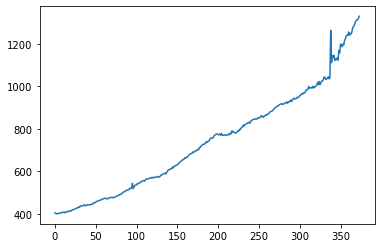

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
df=pd.read_csv('Project Data - monthly.csv')
df['Food Expenditures'].plot()

P-value:  1.0


/Users/kikotsui/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


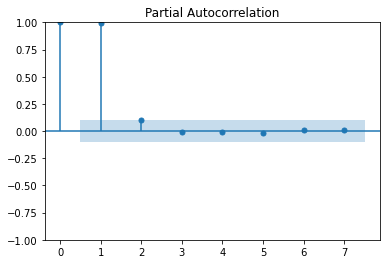

In [49]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(df['Food Expenditures'], autolag='AIC')

# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Food Expenditures'], lags=7)

In [51]:
#you are creating a train and test set and need to have a large enough sample size if your data is small you may have to adjust the length of the data frame (-102) to a smaller number.

# Run the AutoReg Model
# Create training and test data
train_data = df['Food Expenditures'][:len(df)-20]
test_data = df['Food Expenditures'][len(df)-20:]

# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=7).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:      Food Expenditures   No. Observations:                  354
Model:                     AutoReg(7)   Log Likelihood               -1375.486
Method:               Conditional MLE   S.D. of innovations             12.743
Date:                Fri, 28 Apr 2023   AIC                           2768.972
Time:                        12:13:01   BIC                           2803.616
Sample:                             7   HQIC                          2782.766
                                  354                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2705      2.421     -0.525      0.600      -6.016       3.475
Food Expenditures.L1     0.3258      0.053      6.104      0.000       0.221       0.430
Food Expendi

In [52]:
from statsmodels.stats.stattools import durbin_watson

# Fit AR model
ar_model = AutoReg(train_data, lags=7).fit()

# Calculate Durbin-Watson statistic
dw = durbin_watson(ar_model.resid)

# Print Durbin-Watson statistic
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 2.033058191548954


In [60]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('Project Data - monthly.csv')

# Extract the independent variables
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]


# Calculate the VIF values for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Identify variables with high VIF values
high_vif = vif[vif["VIF Factor"] > 100
              ]["features"]

# Remove highly correlated variables
X = X.drop(high_vif, axis=1)

# Get the names of the eliminated features
eliminated_features = list(set(high_vif) - set(X.columns))

# Fit the linear regression model
y = df['Food Expenditures']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary and the eliminated features
print("Eliminated features: ", eliminated_features)
print(model.summary())

Eliminated features:  ['Unemployed Rate', 'Real Personal Income', 'S&P 500', 'GDP', 'Retail Sales', 'Home Price Index', 'CPI']
                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                nan
Time:                        12:27:30   Log-Likelihood:                -2586.9
No. Observations:                 374   AIC:                             5176.
Df Residuals:                     373   BIC:                             5180.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

Explained variance ratio: [1.00000000e+00 1.21713162e-26]


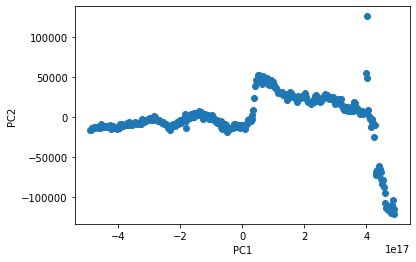

In [69]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('Project Data - monthly.csv')

# Convert the date column to numerical format
df['DATE'] = pd.to_datetime(df['DATE']).astype(int)

# Extract the independent variables


X = df.drop('Food Expenditures', axis=1)

# Instantiate the PCA class
pca = PCA(n_components=2)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Print the variance explained by each principal component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Create a scatter plot of the principal components
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [73]:


from sklearn.decomposition import PCA
import pandas as pd

# Load the dataset
df = pd.read_csv('Project Data - monthly.csv')

# Convert the date column to numerical format
df['DATE'] = pd.to_datetime(df['DATE']).astype(int)

# Extract the independent variables
X = df.drop('Food Expenditures', axis=1)

# Instantiate the PCA class with only one component
pca = PCA(n_components=1)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Instantiate the PCA class
pca = PCA(n_components=1)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Get the loadings of the variables on the first principal component
loadings = pca.components_[0]

# Print the loadings
print(loadings)

# Print the variance explained by the first principal component
print("Explained variance by first principal component:", pca.explained_variance_ratio_[0])

[ 1.00000000e+00  1.80574420e-14  3.04222927e-15  1.78185653e-16
 -2.17887257e-19  1.02608595e-14  4.33650933e-13  1.44099507e-16]
Explained variance by first principal component: 1.0


In [77]:
import numpy as np #linear algebra
import pandas as pd 
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [78]:
df = pd.read_csv('Project Data - monthly.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  374 non-null    object 
 1   Food Expenditures     374 non-null    float64
 2   GDP                   374 non-null    float64
 3   S&P 500               374 non-null    float64
 4   Home Price Index      374 non-null    float64
 5   Unemployed Rate       374 non-null    float64
 6   Real Personal Income  374 non-null    float64
 7   Retail Sales          374 non-null    int64  
 8   CPI                   374 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 26.4+ KB


In [79]:
df.head() # print Head
df.shape

(374, 9)

In [80]:
# Any null variables?
df.isnull().sum() # There are no missing values in the dataset.

DATE                    0
Food Expenditures       0
GDP                     0
S&P 500                 0
Home Price Index        0
Unemployed Rate         0
Real Personal Income    0
Retail Sales            0
CPI                     0
dtype: int64

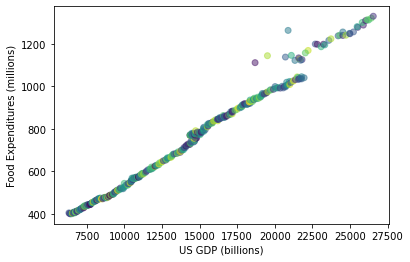

In [81]:
# Scatterplot between dependent variable and independent variables, respectively
colors = np.random.rand(len(df))
plt.scatter(df['GDP'], df['Food Expenditures'], c=colors, alpha=0.5)
plt.xlabel('US GDP (billions)')
plt.ylabel('Food Expenditures (millions)')
plt.show()

In [97]:
# Defining correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                          DATE  Food Expenditures       GDP   S&P 500  \
DATE                  1.000000           0.983335  0.988298  0.866096   
Food Expenditures     0.983335           1.000000  0.994418  0.913177   
GDP                   0.988298           0.994418  1.000000  0.912963   
S&P 500               0.866096           0.913177  0.912963  1.000000   
Home Price Index      0.911199           0.943801  0.948490  0.905012   
Unemployed Rate      -0.034788          -0.050280 -0.112697 -0.294844   
Real Personal Income  0.987767           0.981336  0.983565  0.904530   
Retail Sales          0.969151           0.987473  0.992779  0.938015   
CPI                   0.992510           0.992134  0.994867  0.878968   

                      Home Price Index  Unemployed Rate  Real Personal Income  \
DATE                          0.911199        -0.034788              0.987767   
Food Expenditures             0.943801        -0.050280              0.981336   
GDP                       

In [83]:
# Regression 1: All variables 
# Define the predictor variables and the dependent variable for the regression
X = df[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]
y = df['Food Expenditures']


In [84]:
# Add a constant term to the predictor variables
X = sm.add_constant(X)

In [85]:
# Create a linear regression model
model = sm.OLS(y, X).fit()

In [86]:
import statsmodels.api as sm
import numpy as np

# this will print the standarized coeff
# Create a linear regression model
model = sm.OLS(y, X).fit()

# Obtain standardized coefficients
coef_std = model.params / model.bse

# Print the standardized coefficients
print(coef_std)

const                   -2.804359
GDP                      8.639437
S&P 500                  9.840898
Home Price Index         3.802038
Unemployed Rate         15.157339
Real Personal Income    -0.450195
Retail Sales            -1.302611
CPI                      3.686326
dtype: float64


In [87]:
#This code will convert realtive contributions to a weight
# Create a linear regression model
model = sm.OLS(y, X).fit()

# Obtain standardized coefficients
coef_std = model.params / model.bse

# Take the absolute value of each coefficient, excluding the constant term
coef_abs = abs(coef_std[1:])

# Sum the absolute values
coef_abs_sum = coef_abs.sum()

# Divide each coefficient by the sum of absolute values
coef_norm = coef_abs / coef_abs_sum

# Print the normalized coefficients
print(coef_norm)

GDP                     0.201485
S&P 500                 0.229505
Home Price Index        0.088669
Unemployed Rate         0.353492
Real Personal Income    0.010499
Retail Sales            0.030379
CPI                     0.085971
dtype: float64


In [88]:
# Print the summary statistics for the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.126e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        19:46:17   Log-Likelihood:                -1581.3
No. Observations:                 374   AIC:                             3179.
Df Residuals:                     366   BIC:                             3210.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -89.5902 

In [93]:
# Run the AutoReg Model
# Create training and test data
train_data = df['Food Expenditures'][:len(df)-102]
test_data = df['Food Expenditures'][len(df)-102:]

# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=8).fit()

# Print Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:      Food Expenditures   No. Observations:                  272
Model:                     AutoReg(8)   Log Likelihood                -692.995
Method:               Conditional MLE   S.D. of innovations              3.340
Date:                Thu, 04 May 2023   AIC                           1405.991
Time:                        19:47:32   BIC                           1441.750
Sample:                             8   HQIC                          1420.360
                                  272                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.6801      0.882      0.771      0.441      -1.049       2.409
Food Expenditures.L1     0.5602      0.061      9.225      0.000       0.441       0.679
Food Expendi

In [94]:
from statsmodels.stats.stattools import durbin_watson

# Fit AR model
ar_model = AutoReg(train_data, lags=7).fit()

# Calculate Durbin-Watson statistic
dw = durbin_watson(ar_model.resid)

# Print Durbin-Watson statistic
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 2.0068974156295067


In [95]:
# Extract the independent variables
X= data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]


# Calculate the VIF values for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Identify variables with high VIF values
high_vif = vif[vif["VIF Factor"] > 100
              ]["features"]

# Remove highly correlated variables
X = X.drop(high_vif, axis=1)

# Get the names of the eliminated features
eliminated_features = list(set(high_vif) - set(X.columns))

# Fit the linear regression model
y = df['Food Expenditures']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the model summary and the eliminated features
print("Eliminated features: ", eliminated_features)
print(model.summary())

Eliminated features:  ['Home Price Index', 'Real Personal Income', 'Retail Sales', 'GDP', 'CPI']
                            OLS Regression Results                            
Dep. Variable:      Food Expenditures   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1447.
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.89e-176
Time:                        19:57:53   Log-Likelihood:                -2180.1
No. Observations:                 374   AIC:                             4366.
Df Residuals:                     371   BIC:                             4378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [96]:
from sklearn.decomposition import PCA
import pandas as pd

# Load the dataset
df = pd.read_csv('Project Data - monthly.csv')

# Convert the date column to numerical format
df['DATE'] = pd.to_datetime(df['DATE']).astype(int)

# Extract the independent variables
X = df.drop('Food Expenditures', axis=1)

# Instantiate the PCA class with only one component
pca = PCA(n_components=1)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Instantiate the PCA class
pca = PCA(n_components=1)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X)

# Get the loadings of the variables on the first principal component
loadings = pca.components_[0]

# Print the loadings
print(loadings)

# Print the variance explained by the first principal component
print("Explained variance by first principal component:", pca.explained_variance_ratio_[0])

[ 1.00000000e+00  1.80574420e-14  3.04222927e-15  1.78185653e-16
 -2.17887257e-19  1.02608595e-14  4.33650933e-13  1.44099507e-16]
Explained variance by first principal component: 1.0


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Split the data into X and y
X = data[['GDP', 'S&P 500', 'Home Price Index', 'Unemployed Rate', 'Real Personal Income', 'Retail Sales', 'CPI']]

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF table
print(vif)

              variables          VIF
0                   GDP   749.895225
1               S&P 500    58.660310
2      Home Price Index   135.346486
3       Unemployed Rate    18.375398
4  Real Personal Income   685.659645
5          Retail Sales  1881.955387
6                   CPI   956.176722


In [108]:
from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Assuming your regression model is a LinearRegression model
regression_model = LinearRegression()

# Train the model on the training set
regression_model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = regression_model.predict(X_test)


# Calculate mean squared error
mse = np.mean((y_test - y_pred)**2)

# Calculate relative error
re = np.mean(np.abs(y_test - y_pred) / y_test)

# Calculate squared error
se = np.mean((y_test - y_pred)**2)

# Calculate squared correlation
corr = np.corrcoef(y_test, y_pred)**2

print(f"Mean Squared Error: {mse:.4f}")
print(f"Relative Error: {re:.4f}")
print(f"Squared Error: {se:.4f}")
print(corr)


Mean Squared Error: 165.9609
Relative Error: 0.0163
Squared Error: 165.9609
[[1.         0.99745721]
 [0.99745721 1.        ]]
